In [1]:
import pandas as pd
# Importação de arquivos CSV
import numpy as np
import seaborn as sns
# Visualização de gráficos
import matplotlib.pyplot as plt
# Visualização de gráficos
import plotly.express as px
# Gerar gráficos dinâmicos

In [2]:
analise_deslocados = pd.read_csv("C:/Users/Spaox/Documents/Projeto/Arquivos/Tabelas/Exportadas/deslocados.csv", sep=';', encoding='latin-1')

In [3]:
analise_deslocados

,id,ano,pais_origem,pais_origem_iso,continente,pais_asilo,pais_asilo_iso,refugiados_acnur,requerentes_asilo,idp_acnur,venezuelanos_abroad,expatriados,hst,outros
0,1,2010,Afghanistan,AFG,Asia,-,-,3054699,37101,351907,0,0,0,839323
1,2,2010,Albania,ALB,Europe,-,-,14771,1350,0,0,0,0,36
2,3,2010,Algeria,DZA,Africa,-,-,6665,1714,0,0,0,0,0
3,4,2010,Andorra,AND,Europe,-,-,5,0,0,0,0,0,0
4,5,2010,Angola,AGO,Africa,-,-,134851,710,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1745,2018,Samoa,WSM,Oceania,-,-,0,42,0,0,0,0,0
1745,1746,2018,Western Sahara,ESH,Africa,-,-,116790,1803,0,0,0,0,0
1746,1747,2018,Yemen,YEM,Asia,-,-,31145,35876,2144719,0,0,0,0
1747,1748,2018,Zambia,ZMB,Africa,-,-,266,254,0,0,0,0,0


In [4]:
analise_deslocados.shape

(1749, 14)

In [5]:
analise_deslocados.columns

Index(['id', 'ano', 'pais_origem', 'pais_origem_iso', 'continente',
       'pais_asilo', 'pais_asilo_iso', 'refugiados_acnur', 'requerentes_asilo',
       'idp_acnur', 'venezuelanos_abroad', 'expatriados', 'hst', 'outros'],
      dtype='object')

In [6]:
num_deslocados_acnur_anual = analise_deslocados.groupby(['ano'])['refugiados_acnur'].sum()
print("Quantidade anual de refugiados sob o mandato do ACNUR: " + str(num_deslocados_acnur_anual))

Quantidade anual de refugiados sob o mandato do ACNUR: ano
2010    10548835
2011    10403937
2012    10497017
2013    11698233
2014    14384289
2015    16110276
2016    17184286
2017    19940566
2018    20359553
Name: refugiados_acnur, dtype: int64


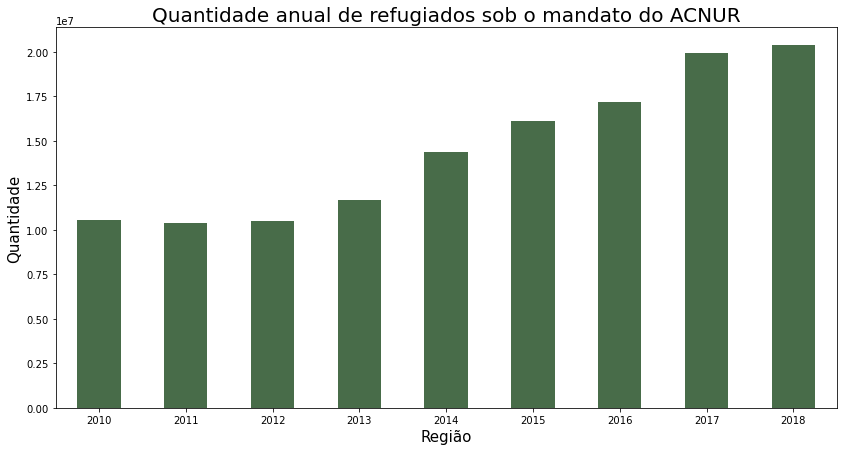

In [7]:
ax = num_deslocados_acnur_anual.plot(kind='bar', figsize=(14,7), fontsize=10, color=(0.1, 0.28, 0.11, 0.8))
ax.set_title("Quantidade anual de refugiados sob o mandato do ACNUR", fontsize=20)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Região", fontsize=15)
plt.xticks(rotation=0, ha='center')
ax.grid(False)
plt.show()

In [8]:
num_deslocados_acnur = analise_deslocados.groupby([analise_deslocados['continente']])['refugiados_acnur'].sum()
print("Quantidade anual de refugiados sob o mandato do ACNUR por continente: " + str(num_deslocados_acnur))

Quantidade anual de refugiados sob o mandato do ACNUR por continente: continente
Africa     44928461
America     3909372
Asia       77057743
Europe      3588646
Oceania       13751
Name: refugiados_acnur, dtype: int64


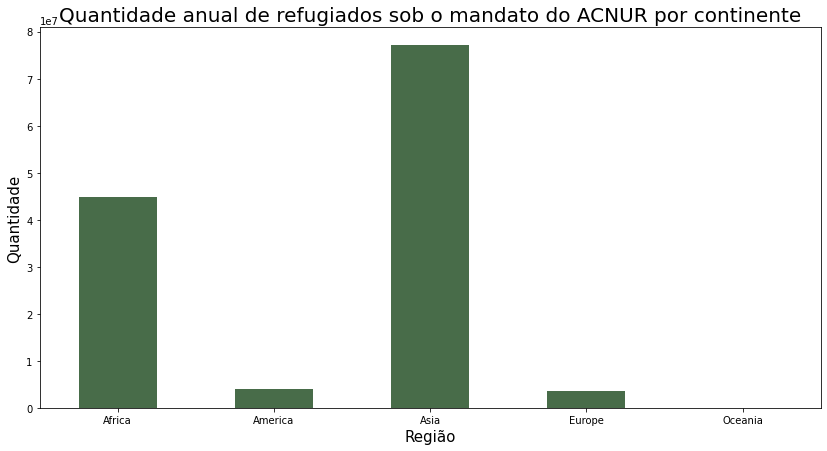

In [9]:
ax = num_deslocados_acnur.plot(kind='bar', figsize=(14,7), fontsize=10, color=(0.1, 0.28, 0.11, 0.8))
ax.set_title("Quantidade anual de refugiados sob o mandato do ACNUR por continente", fontsize=20)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Região", fontsize=15)
plt.xticks(rotation=0, ha='center')
ax.grid(False)
plt.show()

In [10]:
num_deslocados_acnur_continente_anual = analise_deslocados.groupby([analise_deslocados['ano'],analise_deslocados['continente']])['refugiados_acnur'].sum()
print("Quantidade anual de refugiados sob o mandato do ACNUR entre os anos de 2010 e 2018 por continente: " + str(num_deslocados_acnur_continente_anual))

Quantidade anual de refugiados sob o mandato do ACNUR entre os anos de 2010 e 2018 por continente: ano   continente
2010  Africa         2947351
      America         473716
      Asia           6441682
      Europe          499961
      Oceania           2096
2011  Africa         3511163
      America         487879
      Asia           5772515
      Europe          467295
      Oceania           1870
2012  Africa         3677280
      America         495767
      Asia           5713107
      Europe          456725
      Oceania           1667
2013  Africa         3841956
      America         501342
      Asia           6992616
      Europe          233432
      Oceania           1486
2014  Africa         4623072
      America         467776
      Asia           8718679
      Europe          444347
      Oceania           1370
2015  Africa         5381735
      America         452948
      Asia           9609354
      Europe          507327
      Oceania           1375
2016  Africa  

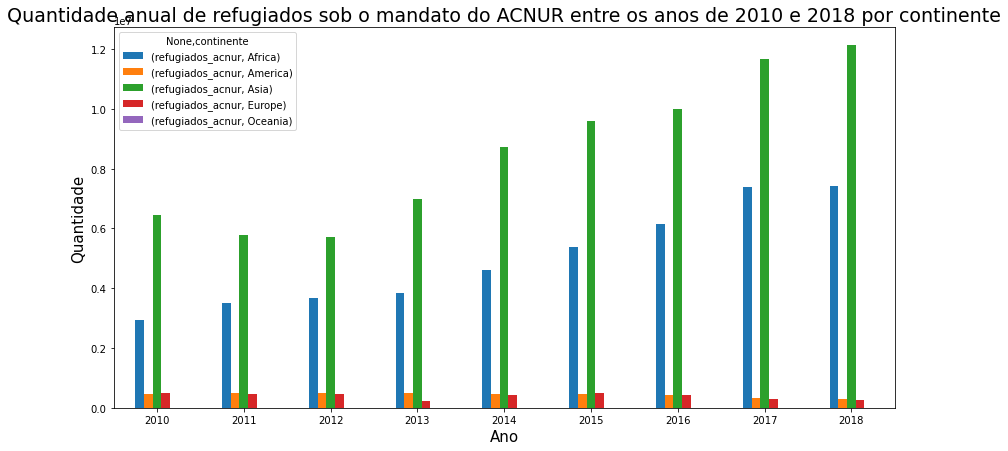

In [11]:
ax = analise_deslocados.groupby([analise_deslocados['ano'],analise_deslocados['continente']]).agg({'refugiados_acnur':'sum'}).unstack().plot(kind='bar', figsize=(14,7), fontsize=10,)
#ax = ax.reset_index()
ax.set_title("Quantidade anual de refugiados sob o mandato do ACNUR entre os anos de 2010 e 2018 por continente", fontsize=19)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.xticks(rotation=0, ha='center')
ax.grid(False)
#ax.rename(columns={'ano':'Total_Numbers'})
plt.show()

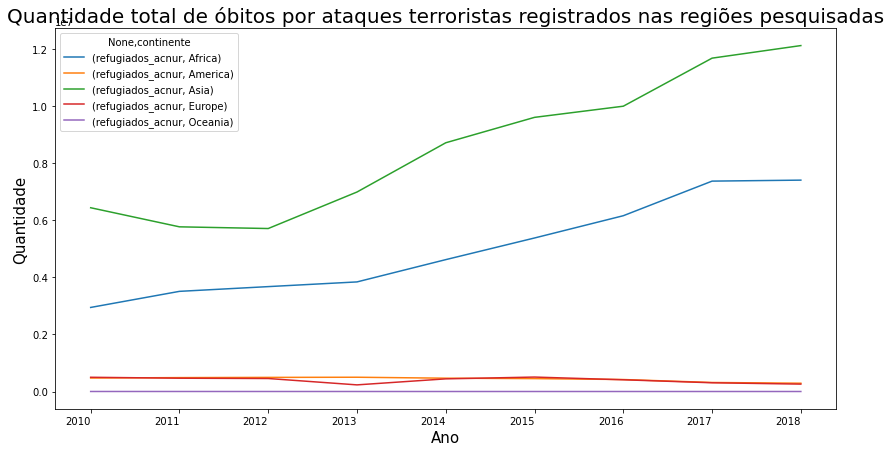

In [12]:
ax = analise_deslocados.groupby([analise_deslocados['ano'],analise_deslocados['continente']]).agg({'refugiados_acnur':'sum'}).unstack().plot(kind='line', figsize=(14,7), fontsize=10,)
ax.set_title("Quantidade total de óbitos por ataques terroristas registrados nas regiões pesquisadas", fontsize=20)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.xticks(rotation=0, ha='right')
ax.grid(False)
plt.show()

In [13]:
num_idp_acnur_anual = analise_deslocados.groupby(['ano'])['idp_acnur'].sum()
print("Quantidade anual de pessoas internamente deslocadas: " + str(num_idp_acnur_anual))

Quantidade anual de pessoas internamente deslocadas: ano
2010    14697804
2011    15473378
2012    17670368
2013    23925555
2014    32274619
2015    37494172
2016    36627127
2017    39118516
2018    41425168
Name: idp_acnur, dtype: int64


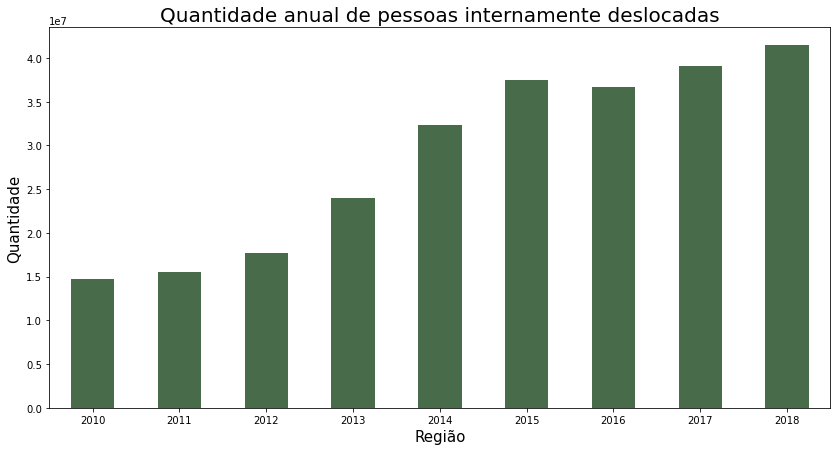

In [14]:
ax = num_idp_acnur_anual.plot(kind='bar', figsize=(14,7), fontsize=10, color=(0.1, 0.28, 0.11, 0.8))
ax.set_title("Quantidade anual de pessoas internamente deslocadas", fontsize=20)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Região", fontsize=15)
plt.xticks(rotation=0, ha='center')
ax.grid(False)
plt.show()

In [15]:
num_idp_acnur = analise_deslocados.groupby([analise_deslocados['continente']])['idp_acnur'].sum()
print("Quantidade de pessoas internamente deslocadas por continente: " + str(num_idp_acnur))

Quantidade de pessoas internamente deslocadas por continente: continente
Africa      92895596
America     53599128
Asia       101684175
Europe      10527808
Oceania            0
Name: idp_acnur, dtype: int64


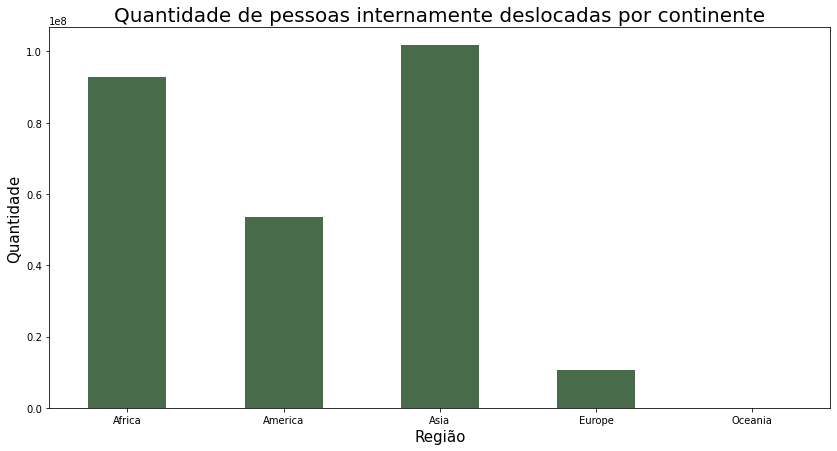

In [16]:
ax = num_idp_acnur.plot(kind='bar', figsize=(14,7), fontsize=10, color=(0.1, 0.28, 0.11, 0.8))
ax.set_title("Quantidade de pessoas internamente deslocadas por continente", fontsize=20)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Região", fontsize=15)
plt.xticks(rotation=0, ha='center')
ax.grid(False)
plt.show()

In [17]:
num_idp_acnur_continente_anual = analise_deslocados.groupby([analise_deslocados['ano'],analise_deslocados['continente']])['idp_acnur'].sum()
print("Quantidade de pessoas internamente deslocadas entre os anos de 2010 e 2018 por continente: " + str(num_idp_acnur_continente_anual))

Quantidade de pessoas internamente deslocadas entre os anos de 2010 e 2018 por continente: ano   continente
2010  Africa         6230071
      America        3672054
      Asia           4376376
      Europe          419303
      Oceania              0
2011  Africa         6961093
      America        3888309
      Asia           4254311
      Europe          369665
      Oceania              0
2012  Africa         7043910
      America        3943509
      Asia           6351679
      Europe          331270
      Oceania              0
2013  Africa         7686896
      America        5368138
      Asia          10558526
      Europe          311995
      Oceania              0
2014  Africa         9920194
      America        6044151
      Asia          15179635
      Europe         1130639
      Oceania              0
2015  Africa        11197751
      America        7113067
      Asia          17265028
      Europe         1918326
      Oceania              0
2016  Africa        11

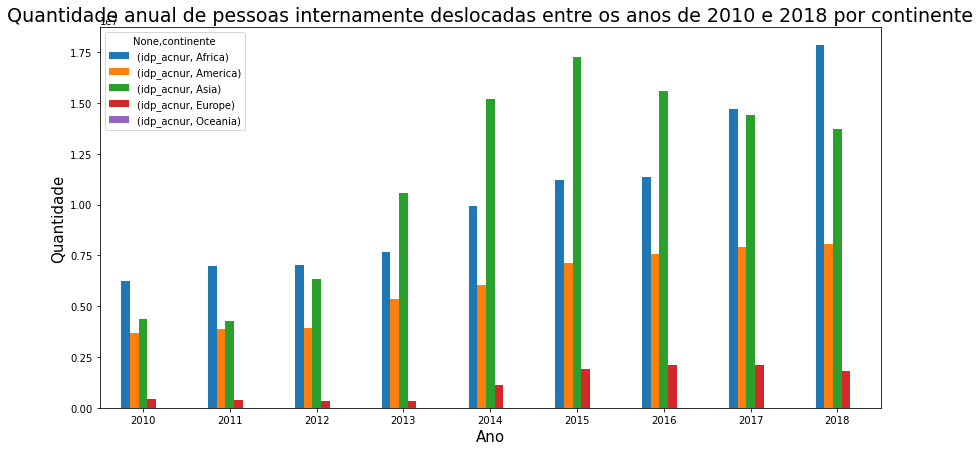

In [18]:
ax = analise_deslocados.groupby([analise_deslocados['ano'],analise_deslocados['continente']]).agg({'idp_acnur':'sum'}).unstack().plot(kind='bar', figsize=(14,7), fontsize=10,)
ax.set_title("Quantidade anual de pessoas internamente deslocadas entre os anos de 2010 e 2018 por continente", fontsize=19)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.xticks(rotation=0, ha='center')
ax.grid(False)
plt.show()

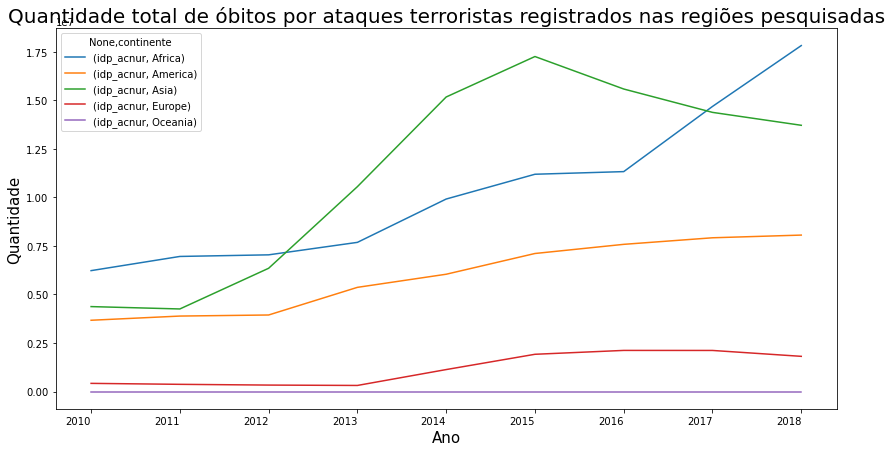

In [19]:
ax = analise_deslocados.groupby([analise_deslocados['ano'],analise_deslocados['continente']]).agg({'idp_acnur':'sum'}).unstack().plot(kind='line', figsize=(14,7), fontsize=10,)
ax.set_title("Quantidade total de óbitos por ataques terroristas registrados nas regiões pesquisadas", fontsize=20)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.xticks(rotation=0, ha='right')
ax.grid(False)
plt.show()